
## **California Housing Prices Prediction**


Introduction

California’s housing market is known for its diversity, and understanding what drives house prices is a classic problem in data science. In this project, we use the California Housing Prices dataset (derived from the 1990 California census) to build a regression model for predicting median house prices in different districts. The dataset includes 10 attributes such as population, median income, and housing characteristics for each district, along with a categorical feature indicating proximity to the ocean, and the target variable is the median house value in USD.

In this notebook, we will walk through an end-to-end machine learning workflow to tackle this problem. The main steps include:

   &nbsp;&nbsp;&nbsp;&nbsp;**1.Exploratory Data Analysis (EDA)** – We start by exploring the dataset with summary statistics and visualizations to          uncover patterns and relationships (e.g., examining distributions and correlations between features and the target).

   &nbsp;&nbsp;&nbsp;&nbsp;**2.Data Preprocessing** – We clean and prepare the data for modeling. This involves handling missing values (for example,    the total_bedrooms column  has some missing entries that we will need to address), encoding the categorical ocean      proximity feature into numerical form,and performing feature scaling or transformations if needed to improve model performance.

   &nbsp;&nbsp;&nbsp;&nbsp;**3.Feature Engineering** – We may create additional features or combine existing ones to capture important trends in the         data. For instance,constructing new ratios (such as rooms per household or bedrooms per room) can provide more informative signals to enhance the model’s predictive power.
   
   &nbsp;&nbsp;&nbsp;&nbsp;**4.Model Training & Selection** – We will experiment with several machine learning algorithms for regression, starting with    a simple Linear Regression as a baseline and then trying more complex models such as Decision Trees, Random Forests, and Gradient Boosting (e.g., XGBoost). Each model is trained on the prepared dataset, and we use techniques like cross-validation to ensure robust performance estimation.

   &nbsp;&nbsp;&nbsp;&nbsp;**5.Model Evaluation** – Using a hold-out test set and cross-validation results, we will evaluate the models using metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to compare their accuracy. We’ll also examine the R² score to understand the proportion of variance in house prices that each model can explain. Based on these metrics, we will select the best-performing model for our task.

   &nbsp;&nbsp;&nbsp;&nbsp;**6.Insights and Conclusions** – Finally, we interpret the results and discuss which features have the most influence on housing prices. For example, we expect median income to be a strong predictor of house value. We’ll also outline possible improvements or next steps (such as hyperparameter tuning or incorporating additional data) and conclude with key takeaways from the project.

This introduction outlines our plan for analyzing and modeling California housing prices. By following this notebook, you’ll see how we can go from raw data to a reliable predictive model, all while gaining insights into the factors affecting home values in California. 

**Let's dive in and start exploring the data!**


### 📦 Library Imports and Environment Setup

&nbsp;&nbsp;&nbsp;&nbsp;Before diving into data analysis and modeling, we import the core Python libraries commonly used on Kaggle for data manipulation, numerical operations, and visualization. These packages will form the foundation of our exploratory data analysis (EDA) and modeling pipeline.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 📥 Load California Housing Dataset
In this step, we load the California Housing Prices dataset from csv file into a pandas DataFrame. Displaying the first few rows allows us to inspect the data structure and confirm that it has been loaded correctly.

In [3]:
df=pd.read_csv(r"C:\Users\purus\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 📝 Dataset Overview
We use the info() method to get a concise summary of the DataFrame, including column names, data types, non-null counts, and memory usage. This helps us identify missing values and ensure each feature is correctly typed before proceeding with analysis and modeling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 📊 Summary Statistics 
The df.describe() function generates summary statistics for each numeric column in the DataFrame, including count, mean, standard deviation, min, and percentiles.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 🧹 Checking Missing Values 
The df.isnull().sum() function returns the total number of missing (NaN) values in each column of the DataFrame.

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 📊 Visualizing Missing Data Across Features
we converts the count of missing values into a dictionary and then uses a bar chart to visualize the number of missing values in each column.

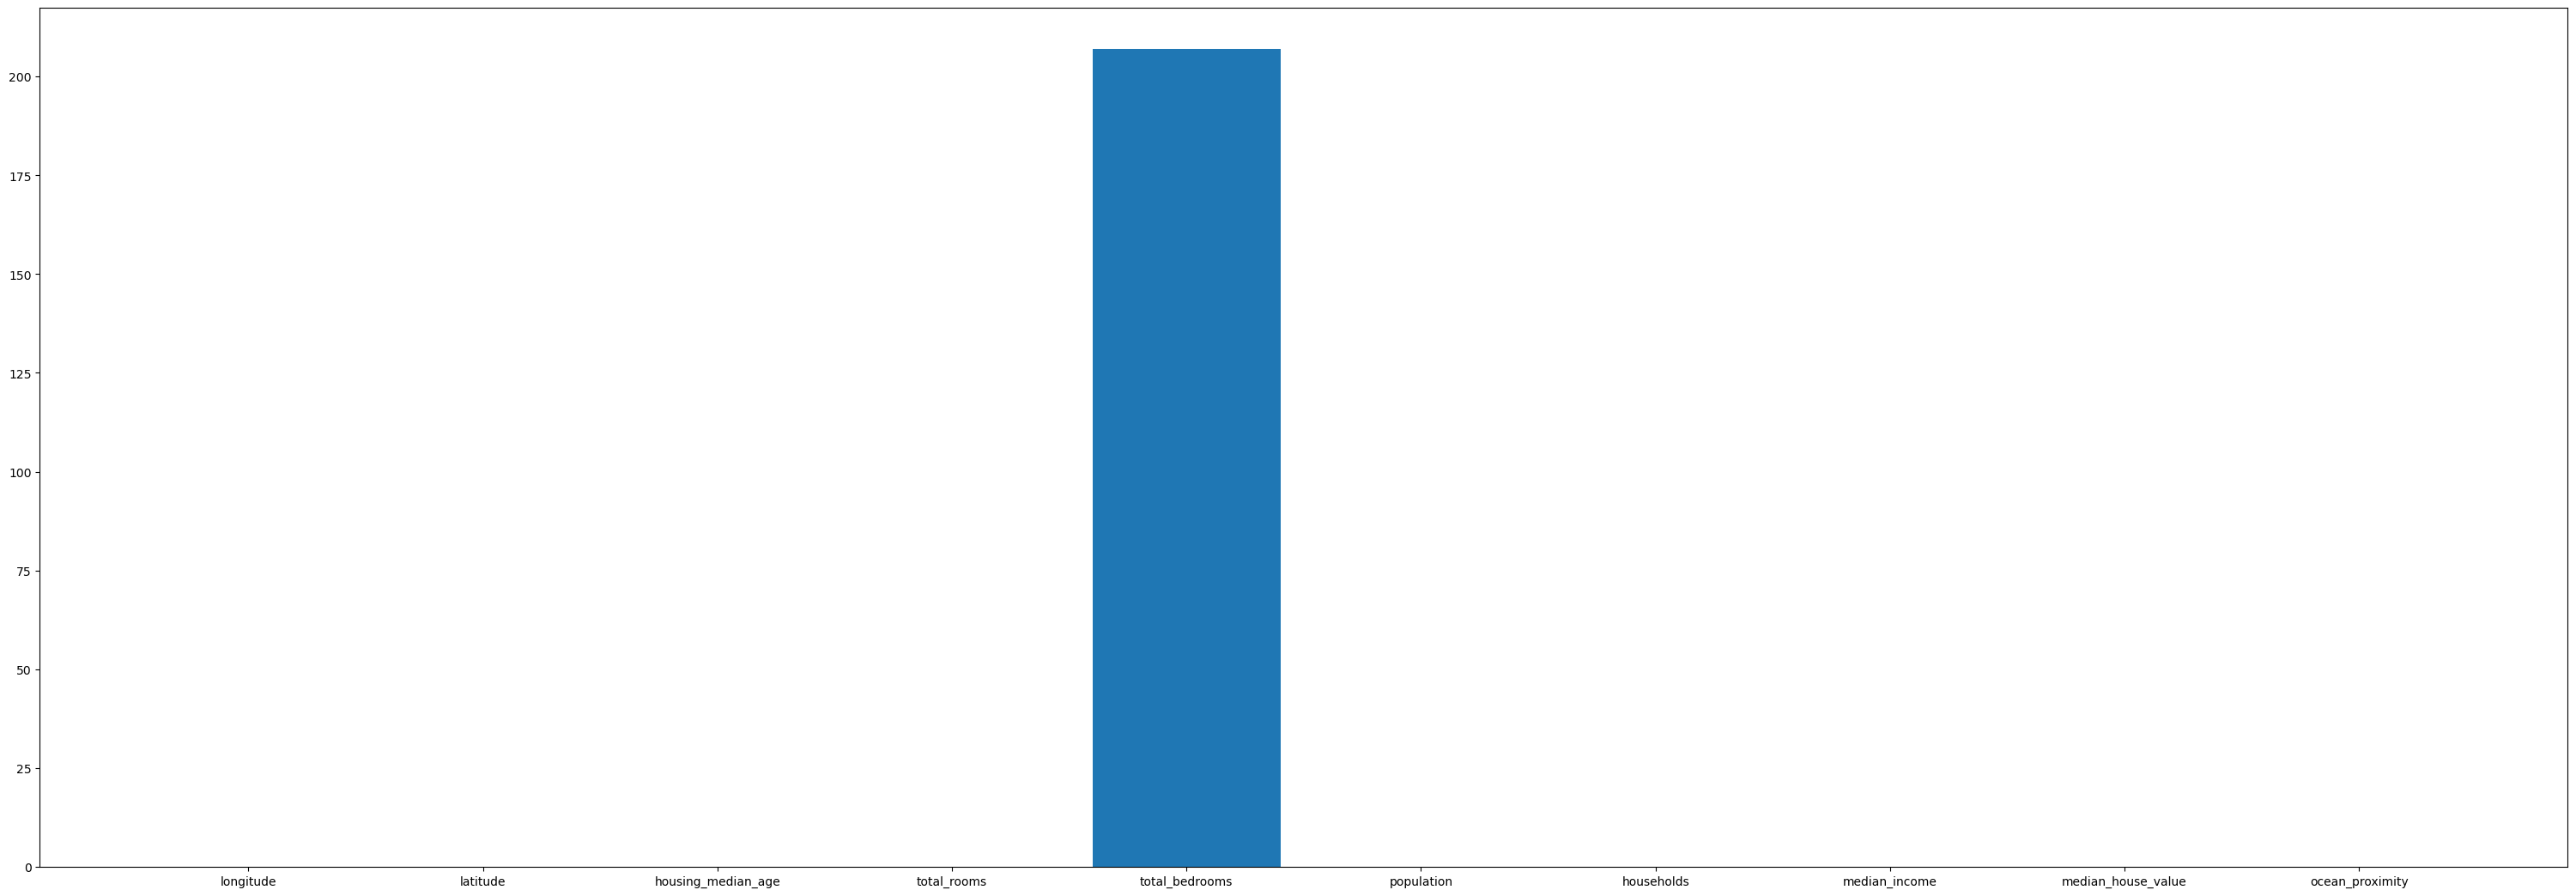

In [7]:
null_data=df.isnull().sum().to_dict()
keys=null_data.keys()
values=null_data.values()
fig=plt.figure(figsize=(38,13))
plt.bar(keys,values)
plt.show()

### 🔥 Heatmap of Missing Data Pattern

we transposes the dataset (`df.transpose()`) and checks for missing values using `.isna()`, resulting in a matrix of True/False values.  
The heatmap created using `seaborn` visually represents **which specific cells** in the dataset contain missing values.

By transposing the data, columns become rows—making it easier to see the **distribution of missing values across all records**.  
This is especially useful for detecting patterns or blocks of missing data that may not be obvious in summary stats.


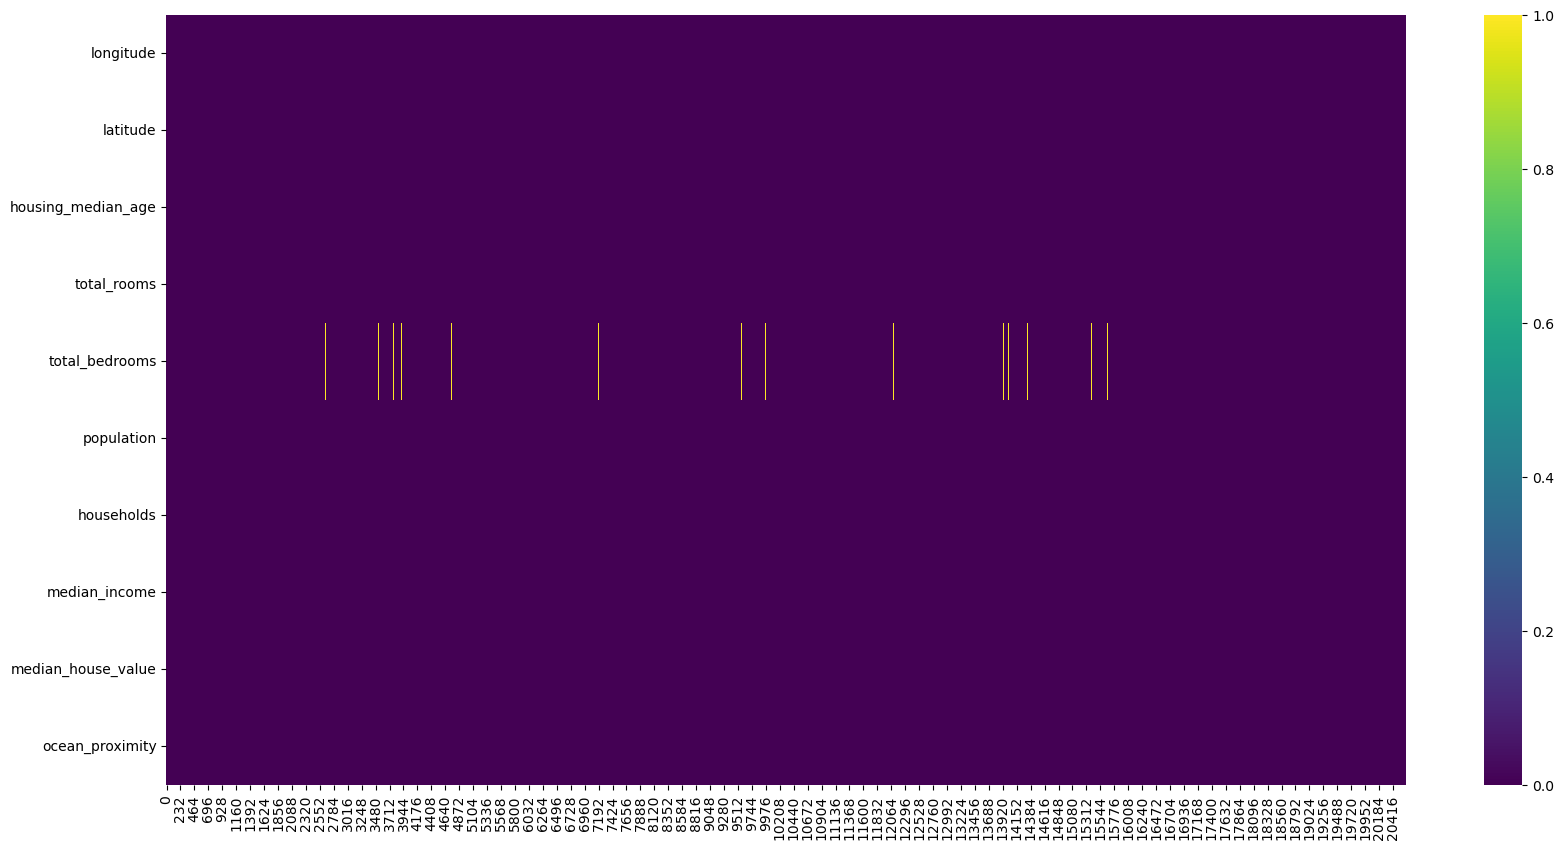

In [8]:
transposed_data=df.transpose().isna()
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(transposed_data,ax=ax,cmap="viridis")
plt.show()

### 🌊 Identifying Unique Categories in 'ocean_proximity'

The `df['ocean_proximity'].unique()` function returns all **distinct categories** present in the `'ocean_proximity'` column.  
Since this is a **categorical feature**, understanding its unique values is essential before applying encoding techniques like one-hot encoding or label encoding.

This step helps in assessing how many **geographical categories** (e.g., 'NEAR BAY', 'INLAND') exist and prepares for transforming them into numerical format for modeling.


In [9]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### 🔢 Encoding 'ocean_proximity' into Numerical Format

Here, the `LabelEncoder` is used to convert the **categorical values** in the `'ocean_proximity'` column into **integer labels** and store them in a new column called `'en_ocean_proximity'`.  
This transformation is essential because machine learning models require numerical input.

The original `'ocean_proximity'` column is then dropped using `df.drop()`, leaving behind its encoded version to be used in model training.


In [10]:

encode=LabelEncoder()
df['en_ocean_proximity']=encode.fit_transform(df['ocean_proximity'])
df.drop('ocean_proximity',axis=1,inplace=True)
df['en_ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: en_ocean_proximity, Length: 20640, dtype: int32

### 🧾 Displaying the First Few Rows after transformation

The `df.head()` function displays the **first 5 rows** of the DataFrame, allowing a quick look at the structure and contents of the dataset after preprocessing.  
This helps verify that transformations (like encoding and column removal) have been applied correctly and the data is in the right format for analysis or modeling.


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,en_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### ⚖️ Feature Scaling Using StandardScaler

we apply **Standardization** to the dataset using `StandardScaler`, which transforms each feature to have **zero mean and unit variance**.  
It ensures that all features contribute equally to the model and helps improve the performance of algorithms sensitive to feature scale.

The scaled values are stored in a new DataFrame `data_scaled`, preserving the original column names and row indices for consistency.


In [12]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)
data_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,en_ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,1.291089
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,-0.116739


### 🧼 Dropping Columns with Missing Values and Checking Data Info

we remove  columns from the scaled dataset (`data_scaled`) that still contain **missing values** using `dropna(axis=1)`, and stores the cleaned result in `data_col`.  
we then calls `data_col.info()` to display a concise summary of the DataFrame, including the number of non-null entries, column names, and data types.




In [13]:
#eliminating columns containg missing values
data_col=data_scaled.dropna(axis=1)
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   en_ocean_proximity  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 📈 Building and Evaluating a Linear Regression Model by Removing Columns Containning Missing Data

In this step, we begin by splitting the dataset into features (`x_col`) and the target variable (`y_col`), which is the `median_house_value`.  
We then use `train_test_split()` to divide the data into training and testing sets with 70% for training and 30% for testing.

Next, we train a **Linear Regression** model using the training data and make predictions on the test set.  
Finally, we evaluate the model using three metrics:
- `model.score()` and `r2_score()` to check how well the model explains the variance in house prices
- `RMSE` (Root Mean Squared Error) to measure the average prediction error in the same units as the target variable


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y_col=data_col['median_house_value']
x_col=data_col.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_col,y_col,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Score", model.score(x_test,y_test))
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

Score 0.6213596164296769
R2 Score: 0.6213596164296769
RMSE: 0.6213027801022298


### 🧼 Dropping Rows with Missing Values and Checking Data Info

 now we remove  rows from the scaled dataset (`data_scaled`) that still contain **missing values** using `dropna`, and stores the cleaned result in `data_row`.  
we then calls `data_row.info()` to display a concise summary of the DataFrame, including the number of non-null entries, column names, and data types.




In [15]:
#eliminating rows containg missing values
data_row=data_scaled.dropna()
data_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   en_ocean_proximity  20433 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


### 📈 Building and Evaluating a Linear Regression Model by Removing Rows Containning Missing Data
now we train a linear regression model using the `data_row`dataset .now we compare both models and deciede whether to delete rows or columns containing missing values.

In [16]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y_row=data_row['median_house_value']
x_row=data_row.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_row,y_row,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Score", model.score(x_test,y_test))
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

Score 0.6227677564940453
R2 Score: 0.6227677564940453
RMSE: 0.6123957245542443


### 🛠️ Handling Missing Values with Median Imputation and Model Evaluation

In this step, we handle missing values in the `total_bedrooms` column by replacing them with the **median** of that column.  
This technique preserves the distribution better than mean imputation, especially in the presence of outliers.

After filling the missing values, we split the data into training and testing sets, train a **Linear Regression** model, and evaluate its performance using:
- `model.score()` and `r2_score()` to measure how well the model fits the data  
- `RMSE` to estimate the average prediction error in house price units

This helps us compare how **median imputation** affects model performance compared to other missing data strategies.


In [17]:

mdn=data_scaled.total_bedrooms.median()
data_mdn=data_scaled.fillna({'total_bedrooms':mdn})
y_mdn=data_mdn['median_house_value']
x_mdn=data_mdn.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_mdn,y_mdn,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Score", model.score(x_test,y_test))
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

Score 0.6246552364808077
R2 Score: 0.6246552364808077
RMSE: 0.61227043838211


### 🧮 Mean Imputation for Missing Values and Model Evaluation

In this section, we fill the missing values in the `total_bedrooms` column using the **mean** of that column.  
Mean imputation is a simple and commonly used method to handle missing data while retaining the overall size of the dataset.

We then train a **Linear Regression** model on the data and evaluate it using:
- `R² Score` to assess the proportion of variance explained by the model  
- `RMSE` to measure the average error between actual and predicted house prices

By comparing this with the **median imputation** approach, we can see which strategy gives better model performance.


In [18]:
#filling missing values with scaled mean
mn=data_scaled.total_bedrooms.mean()
data_mn=data_scaled.fillna({'total_bedrooms':mn})
y_mn=data_mn['median_house_value']
x_mn=data_mn.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_mdn,y_mdn,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Score", model.score(x_test,y_test))
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

Score 0.6302800813893871
R2 Score: 0.6302800813893871
RMSE: 0.6076503759284649


### 📊 Mode Imputation for Missing Values and Model Evaluation

In this part, we handle missing values in the `total_bedrooms` column by filling them with the **mode** (most frequently occurring value).  
This is especially useful when the feature is **discrete or has repeated values**, as it reflects the most common case in the data.

After imputation, we split the data, train a **Linear Regression** model, and evaluate it using:
- `R² Score` to measure how well the model fits  
- `RMSE` to understand the average prediction error

By comparing the results from **mean**, **median**, and **mode** imputation, we can decide which strategy gives the most reliable predictions for this dataset.


In [19]:

md=data_scaled.total_bedrooms.mode()[0]
data_md=data_scaled.fillna({'total_bedrooms':md})
y_md=data_md['median_house_value']
x_md=data_md.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_mdn,y_mdn,test_size=0.3)
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Score", model.score(x_test,y_test))
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))

Score 0.6325668661122857
R2 Score: 0.6325668661122857
RMSE: 0.6107172673910843


### ✅ Conclusion on Handling Missing Values

We've used various methods to handle missing values, including **row removal**,**column removal**, **median imputation**, **mean imputation**, and **mode imputation**.  
After evaluating each method using a Linear Regression model, we concluded that **filling missing values with the mean** provides better accuracy in this case.
### 🔍 Verifying Missing Values After Mean Imputation

We use `data_mn.isna().sum()` to confirm that all missing values in the dataset have been successfully filled.  
This check ensures that our **mean imputation** for the `total_bedrooms` column was applied correctly and that the dataset is now fully complete and ready for modeling.


In [20]:
data_mn.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
en_ocean_proximity    0
dtype: int64

we can conclude that there are no missing values in the above dataset

### 🧾 Final Dataset Summary and Structure Check

We call `data_mn.info()` to get a concise overview of the dataset, including the number of non-null entries and data types.  
Then, we use `data_mn.dtypes` to inspect the data types of each column, ensuring that all features are in the correct format for modeling.

Lastly, `data_mn.describe()` provides summary statistics for each numerical column — including mean, standard deviation, and percentiles — helping us understand the distribution of values across the dataset after imputation.


In [21]:
data_mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   en_ocean_proximity  20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [22]:
data_mn.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
en_ocean_proximity    float64
dtype: object

In [23]:
data_mn.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,en_ocean_proximity
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.526513e-15,-1.079584e-15,5.508083e-18,3.201573e-17,-7.160508e-17,-1.101617e-17,6.885104e-17,6.609700e-17,-9.363741e-17,-5.508083e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,9.949969e-01,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.274093e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00,-8.206532e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.716302e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01,-8.206532e-01
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.370112e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01,-1.167392e-01
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.500849e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01,-1.167392e-01
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.401871e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00,1.995003e+00


### 🧠 Feature Engineering: Creating Ratio-Based Features

In this step, we create new features to capture deeper relationships within the data.  
We first copy the mean-imputed dataset into `data_fe` to preserve the original version.

Then, we engineer:
- `bedroom_ratio`: the proportion of bedrooms to total rooms, which helps indicate housing density and space utilization.
- `household_rooms`: the average number of rooms per household, giving us a sense of how spacious homes are in each district.

These new features may improve model performance by offering more informative signals about housing conditions.


In [24]:
# Create ratio of bedrooms to total rooms to capture layout density
data_fe=data_mn.copy()
data_fe['bedroom_ratio'] = data_mn['total_bedrooms'] / data_mn['total_rooms']

# Compute rooms per household to reflect average space per household
data_fe['household_rooms'] = data_mn['total_rooms'] / data_mn['households']
data_fe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,en_ocean_proximity,bedroom_ratio,household_rooms
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,1.291089,1.205644,0.823738
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,1.291089,0.659017,1.225112
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,1.291089,1.540956,0.635043
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,1.291089,1.151475,0.850682
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,1.291089,1.323463,0.734958
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,-0.116739,0.873950,1.003464
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,-0.116739,1.035765,0.881283
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,-0.116739,0.717000,1.005479
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,-0.116739,0.860050,0.903105


### 📊 Visualizing Feature Distributions with Histograms

We use `data_mn.hist()` to plot histograms for all numerical features in the dataset, with 100 bins and a figure size of 15×15 for better visibility.  
This helps us understand the **distribution, skewness, and spread** of each feature — which is useful for identifying outliers, transformations needed, or non-normal patterns that may affect model performance.


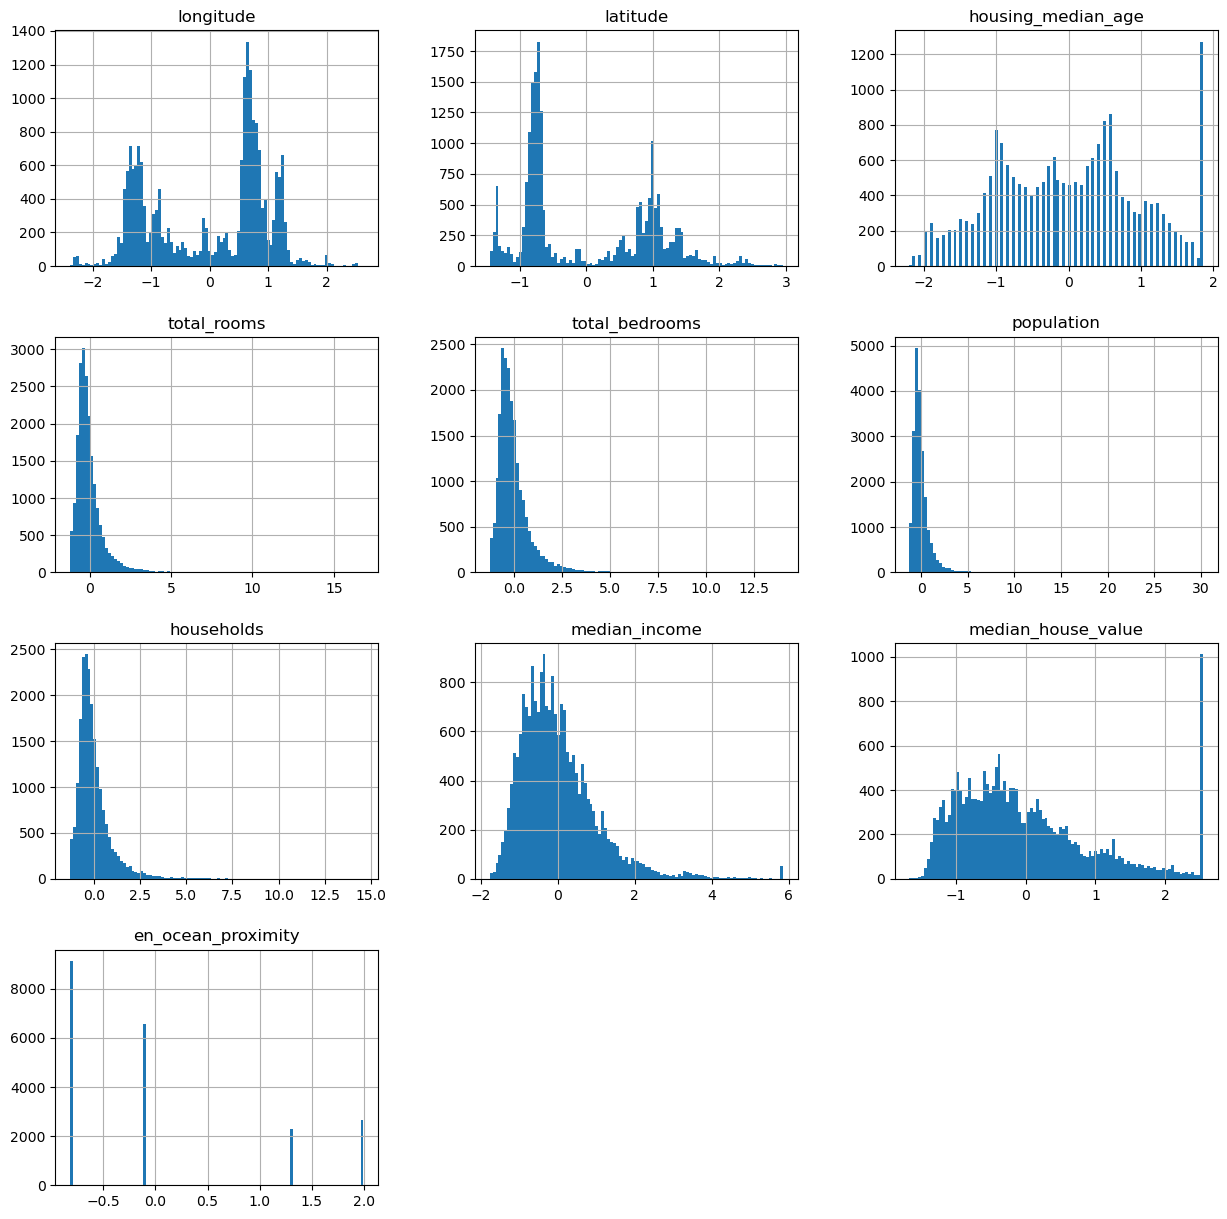

In [25]:
data_mn.hist(bins=100,figsize=(15,15))
plt.show()

### 🔗 Correlation Heatmap to Explore Feature Relationships

We compute the correlation matrix using `data_mn.corr()` to measure the linear relationship between all pairs of numerical features.  
Then, we visualize it using a heatmap with the `BrBG` color palette, centered at 0, and annotations enabled for exact correlation values.

This visualization helps us quickly identify **strong positive or negative correlations**, which is useful for feature selection, multicollinearity detection, and better understanding how features relate to the target variable (`median_house_value`).


<Axes: >

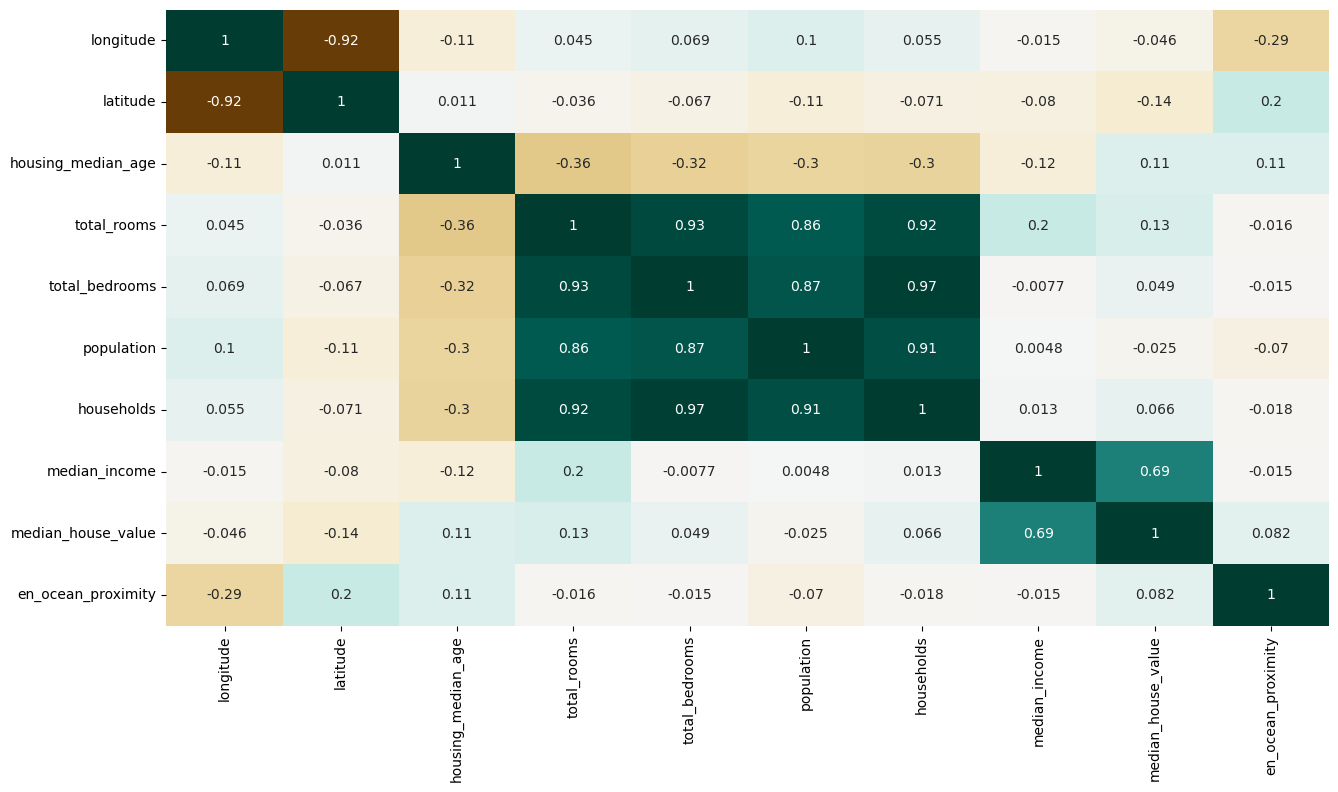

In [26]:
corr_matrix=data_mn.corr()
plt.figure(1,figsize=(15,8))
sns.heatmap(corr_matrix,cmap='BrBG',center=0,annot=True,cbar=False)

### 📈 Correlation of Features with Median House Value

Here, we extract the correlation values between all features and the target variable `median_house_value` using `.corr()` and sort them in descending order.  
This helps us **identify which features are most strongly correlated** with house prices, allowing us to prioritize those variables during model training and feature selection.


In [27]:
data_mn.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
en_ocean_proximity    0.081750
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 🧠 Evaluating Correlation After Feature Engineering

We compute the correlation between all features in our feature-engineered dataset (`data_fe`) and the target variable `median_house_value`, then sort the values in descending order.  
This helps us assess whether the **newly created features** (like `bedroom_ratio` and `household_rooms`) have a meaningful relationship with house prices and whether they contribute positively to the predictive power of our model.


In [28]:
data_fe.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
en_ocean_proximity    0.081750
households            0.065843
total_bedrooms        0.049454
household_rooms       0.000345
bedroom_ratio        -0.002519
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### ✅ Final Dataset Selection for Modeling

After exploring different preprocessing strategies and feature transformations, we decided to proceed with the **mean-imputed dataset (`data_mn`)** for building our final model.  
We define `y` as the target variable (`median_house_value`) and `x` as the set of input features, then split the data into training and testing sets using a 75/25 ratio.

This clean and complete dataset provides a solid foundation for training accurate and reliable machine learning models.


In [29]:
y=data_mn['median_house_value']
x=data_mn.drop('median_house_value',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


## 🚦 Model Training and Comparison

Now that our dataset is clean, preprocessed, and ready, we begin the most critical phase of this project — **training and evaluating multiple machine learning models** to predict housing prices.

We'll start by building a simple **Linear Regression model** as our baseline.  
Then, we'll explore more powerful algorithms like **Decision Tree**, **Random Forest**, and **Gradient Boosting**, comparing their performance using key metrics such as **R² Score**, **Root Mean Squared Error (RMSE)**, and **Mean Squared Error (MSE)**.

This approach allows us to identify the most accurate and reliable model for predicting California's median house values based on various features in the dataset.

### 📘 Model 1: Linear Regression

Linear Regression is a fundamental statistical technique that models the relationship between independent variables and a continuous target variable by fitting a linear equation.  
We’re using it here as a **baseline model** — to understand how well a simple linear approach performs before moving on to more complex algorithms.


In [30]:
from sklearn.metrics import mean_squared_error
model1=LinearRegression()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print('MSE:', mean_squared_error(y_test,y_predict))

R2 Score: 0.6286434706376096
RMSE: 0.606992354601027
MSE: 0.36843971854409885


### 🌳 Model 2: Decision Tree Regressor

A **Decision Tree Regressor** is a non-linear model that splits the data into branches based on feature values to make predictions.  
It works well when there are complex, non-linear relationships between the features and the target variable.

In this step, we train a Decision Tree on the same training data and evaluate its performance using R² Score, RMSE, and MSE.  
This allows us to see how well the model captures patterns in the data compared to our baseline Linear Regression model.


In [31]:
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print('MSE:', mean_squared_error(y_test,y_predict))


R2 Score: 0.6303901033563211
RMSE: 0.605563212810645
MSE: 0.3667068047095504


### 🌲 Model 3: Random Forest Regressor

A **Random Forest Regressor** is an ensemble learning method that builds multiple decision trees and combines their predictions to produce more accurate and stable results.  
By averaging the outputs of many trees, it reduces overfitting and improves generalization compared to a single Decision Tree.

We train the Random Forest model on our dataset and evaluate its performance using **R² Score**, **RMSE**, and **MSE**.  
This model often performs very well in regression tasks, especially when the data has complex, non-linear relationships.


In [32]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
y_predict=model3.predict(x_test)
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print('MSE:', mean_squared_error(y_test,y_predict))


R2 Score: 0.808308153149875
RMSE: 0.436103437163993
MSE: 0.1901862079062488


### ⚙️ Checking Default Hyperparameters of RandomForestRegressor

We use `RandomForestRegressor().get_params()` to view all the **default hyperparameters** of the Random Forest model.  
This gives us a complete overview of what settings the model is using by default — such as the number of trees (`n_estimators`), maximum depth (`max_depth`), and splitting criteria (`min_samples_split`, `max_features`, etc.).

Understanding these defaults helps us decide **which parameters to tune** using techniques like GridSearchCV to optimize model performance.


In [33]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 🔍 Hyperparameter Tuning: Random Forest Regressor with GridSearchCV

After testing various models, we now fine-tune the **Random Forest Regressor** using `GridSearchCV`, which performs an **exhaustive search** over a specified set of hyperparameters.  
We define a grid of possible values for key parameters like:

- `n_estimators`: number of trees in the forest  
- `max_depth`: maximum depth of each tree  
- `min_samples_split` and `min_samples_leaf`: control the complexity of splits  
- `max_features`: strategy for choosing features at each split

`GridSearchCV` uses **5-fold cross-validation** and selects the combination of parameters that yields the best **R² score** on the validation sets.

Once the best model is found, we evaluate it on the test set to check its final **R² performance**, ensuring we've optimized the Random Forest effectively.


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1,2,3],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  
    scoring='r2',  
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train,y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
426 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score: 0.8137493008053482


In [35]:
from sklearn import svm
model4=svm.SVR()
model4.fit(x_train,y_train)
y_predict=model4.predict(x_test)
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print('MSE:', mean_squared_error(y_test,y_predict))

R2 Score: 0.7590082729903836
RMSE: 0.4889773648721931
MSE: 0.23909886335735386


### ⚙️ Inspecting Default Hyperparameters of SVC (Support Vector Classifier)

We use `sklearn.svm.SVC().get_params()` to display the **default hyperparameter settings** of the `SVC` (Support Vector Classifier) model.  
Understanding these defaults helps us configure or tune the SVC model more effectively, especially when applying it to classification problems.


In [36]:
import sklearn
sklearn.svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### ⚡ Model 5: XGBoost Regressor

**XGBoost (Extreme Gradient Boosting)** is a highly efficient and scalable machine learning algorithm known for delivering state-of-the-art results in regression and classification tasks.  
It builds trees sequentially, where each new tree attempts to correct the errors of the previous ones.

In this step, we train the XGBoost Regressor using:
- `n_estimators=100`: the number of boosting rounds (trees)
- `learning_rate=0.1`: the step size shrinkage used to prevent overfitting

After training, we evaluate the model on the test set using:
- **R² Score** to measure goodness of fit  
- **RMSE** and **MSE** to quantify prediction errors

This powerful model often performs better than traditional regressors, especially with well-preprocessed and structured data.


In [37]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)

y_predict=model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print('MSE:', mean_squared_error(y_test,y_predict))


R2 Score: 0.8192901840127402
RMSE: 0.4234270127630162
MSE: 0.1792904351374115
